## 지하철 상관관계분석

### 데이터 정보
- 지하철 정보: 역사명/ 동/ 호선/ 환승여부/ 역위.경도/ 구군별
- 하행 대기시간/ 상행 대기시간
- 승하차 레벨: 일평균승차/ 일평균하차/ 일평균승하차/ 순위
- 상가: 갯수/ 사용중인 상가/ 비어있는 상가
- 소계 레벨: 소계 레벨/ 1인가구수 레벨/ 업장수 레벨

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

#### 한글 폰트 설정

In [32]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('data/데이터_합본.csv', index_col=0, encoding='euc-kr')
df.head(5)

,역사명,동별,호선,환승,역위도,역경도,하행 대기시간,상행 대기시간,일평균승차 레벨,일평균하차 레벨,일평균승하차 레벨,순위 레벨,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계 레벨,1인가구수 레벨,업장 수 레벨
0,다대포해수욕장,다대1동,1,NaN,35.048670,128.964100,20,0,4,4,4,6,2.0,2.0,0.0,사하구,10.0,9.0,8.0
1,다대포항,다대1동,1,NaN,35.057820,128.971300,20,20,2,3,3,7,1.0,1.0,0.0,사하구,10.0,9.0,8.0
2,낫개,다대2동,1,NaN,35.065265,128.979873,20,20,4,4,4,6,1.0,1.0,0.0,사하구,9.0,8.0,7.0
3,신장림,장림2동,1,NaN,35.074433,128.977041,20,20,2,2,2,8,1.0,1.0,0.0,사하구,8.0,8.0,8.0
4,장림,장림2동,1,NaN,35.081090,128.977500,20,20,2,2,2,8,1.0,1.0,0.0,사하구,8.0,8.0,8.0


#### 2. NaN -> 0
- 직접 만든 파일. 결측치만 0으로 채워주면 된다.

In [4]:
df.isnull().sum()

역사명            0
동별             0
호선             0
환승           102
역위도            0
역경도            0
하행 대기시간        0
상행 대기시간        0
일평균승차 레벨       0
일평균하차 레벨       0
일평균승하차 레벨      0
순위 레벨          0
상가 갯수         41
사용중인 상가       41
비어있는 상가       41
구군별            8
소계 레벨          8
1인가구수 레벨       8
업장 수 레벨        8
dtype: int64

In [5]:
df = df.fillna(0)
df.isnull().sum()

역사명          0
동별           0
호선           0
환승           0
역위도          0
역경도          0
하행 대기시간      0
상행 대기시간      0
일평균승차 레벨     0
일평균하차 레벨     0
일평균승하차 레벨    0
순위 레벨        0
상가 갯수        0
사용중인 상가      0
비어있는 상가      0
구군별          0
소계 레벨        0
1인가구수 레벨     0
업장 수 레벨      0
dtype: int64

In [37]:
df_dr = df.drop(['하행 대기시간','상행 대기시간','역사명','동별','호선','환승','역위도','역경도','구군별'], axis=1)
# '일평균승차 레벨','일평균하차 레벨',
df_dr.head()

,일평균승차 레벨,일평균하차 레벨,일평균승하차 레벨,순위 레벨,상가 갯수,사용중인 상가,비어있는 상가,소계 레벨,1인가구수 레벨,업장 수 레벨
0,4,4,4,6,2.0,2.0,0.0,10.0,9.0,8.0
1,2,3,3,7,1.0,1.0,0.0,10.0,9.0,8.0
2,4,4,4,6,1.0,1.0,0.0,9.0,8.0,7.0
3,2,2,2,8,1.0,1.0,0.0,8.0,8.0,8.0
4,2,2,2,8,1.0,1.0,0.0,8.0,8.0,8.0


In [38]:
df_dr_corr = df_dr.corr()
df_dr_corr

,일평균승차 레벨,일평균하차 레벨,일평균승하차 레벨,순위 레벨,상가 갯수,사용중인 상가,비어있는 상가,소계 레벨,1인가구수 레벨,업장 수 레벨
일평균승차 레벨,1.000000,0.987314,0.994992,-0.994007,0.241214,0.253725,0.109060,0.147894,0.200446,0.409998
일평균하차 레벨,0.987314,1.000000,0.992297,-0.992383,0.223270,0.235155,0.099867,0.150748,0.202164,0.431254
일평균승하차 레벨,0.994992,0.992297,1.000000,-0.995450,0.234076,0.248240,0.098664,0.153939,0.201202,0.423349
순위 레벨,-0.994007,-0.992383,-0.995450,1.000000,-0.237187,-0.250140,-0.104934,-0.158257,-0.211752,-0.417245
상가 갯수,0.241214,0.223270,0.234076,-0.237187,1.000000,0.979887,0.707169,0.016726,0.035522,0.225891
사용중인 상가,0.253725,0.235155,0.248240,-0.250140,0.979887,1.000000,0.551851,0.001771,0.020361,0.237257
비어있는 상가,0.109060,0.099867,0.098664,-0.104934,0.707169,0.551851,1.000000,0.063623,0.076304,0.103373
소계 레벨,0.147894,0.150748,0.153939,-0.158257,0.016726,0.001771,0.063623,1.000000,0.874962,0.609800
1인가구수 레벨,0.200446,0.202164,0.201202,-0.211752,0.035522,0.020361,0.076304,0.874962,1.000000,0.597969
업장 수 레벨,0.409998,0.431254,0.423349,-0.417245,0.225891,0.237257,0.103373,0.609800,0.597969,1.000000


plt.figure(figsize = (15,15)) : 표 사이즈 = 15x15

- 내부 속성
    - annot(annotation): 각 셀의 값 표시 여부 (True=표시) 
    - fmt annot=True 일 때, 숫자 표시 ('.2f' : 소수 두번째자리까지 표시)
    - cmap : 색상 선택
- <a href='https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816'>참고</a>

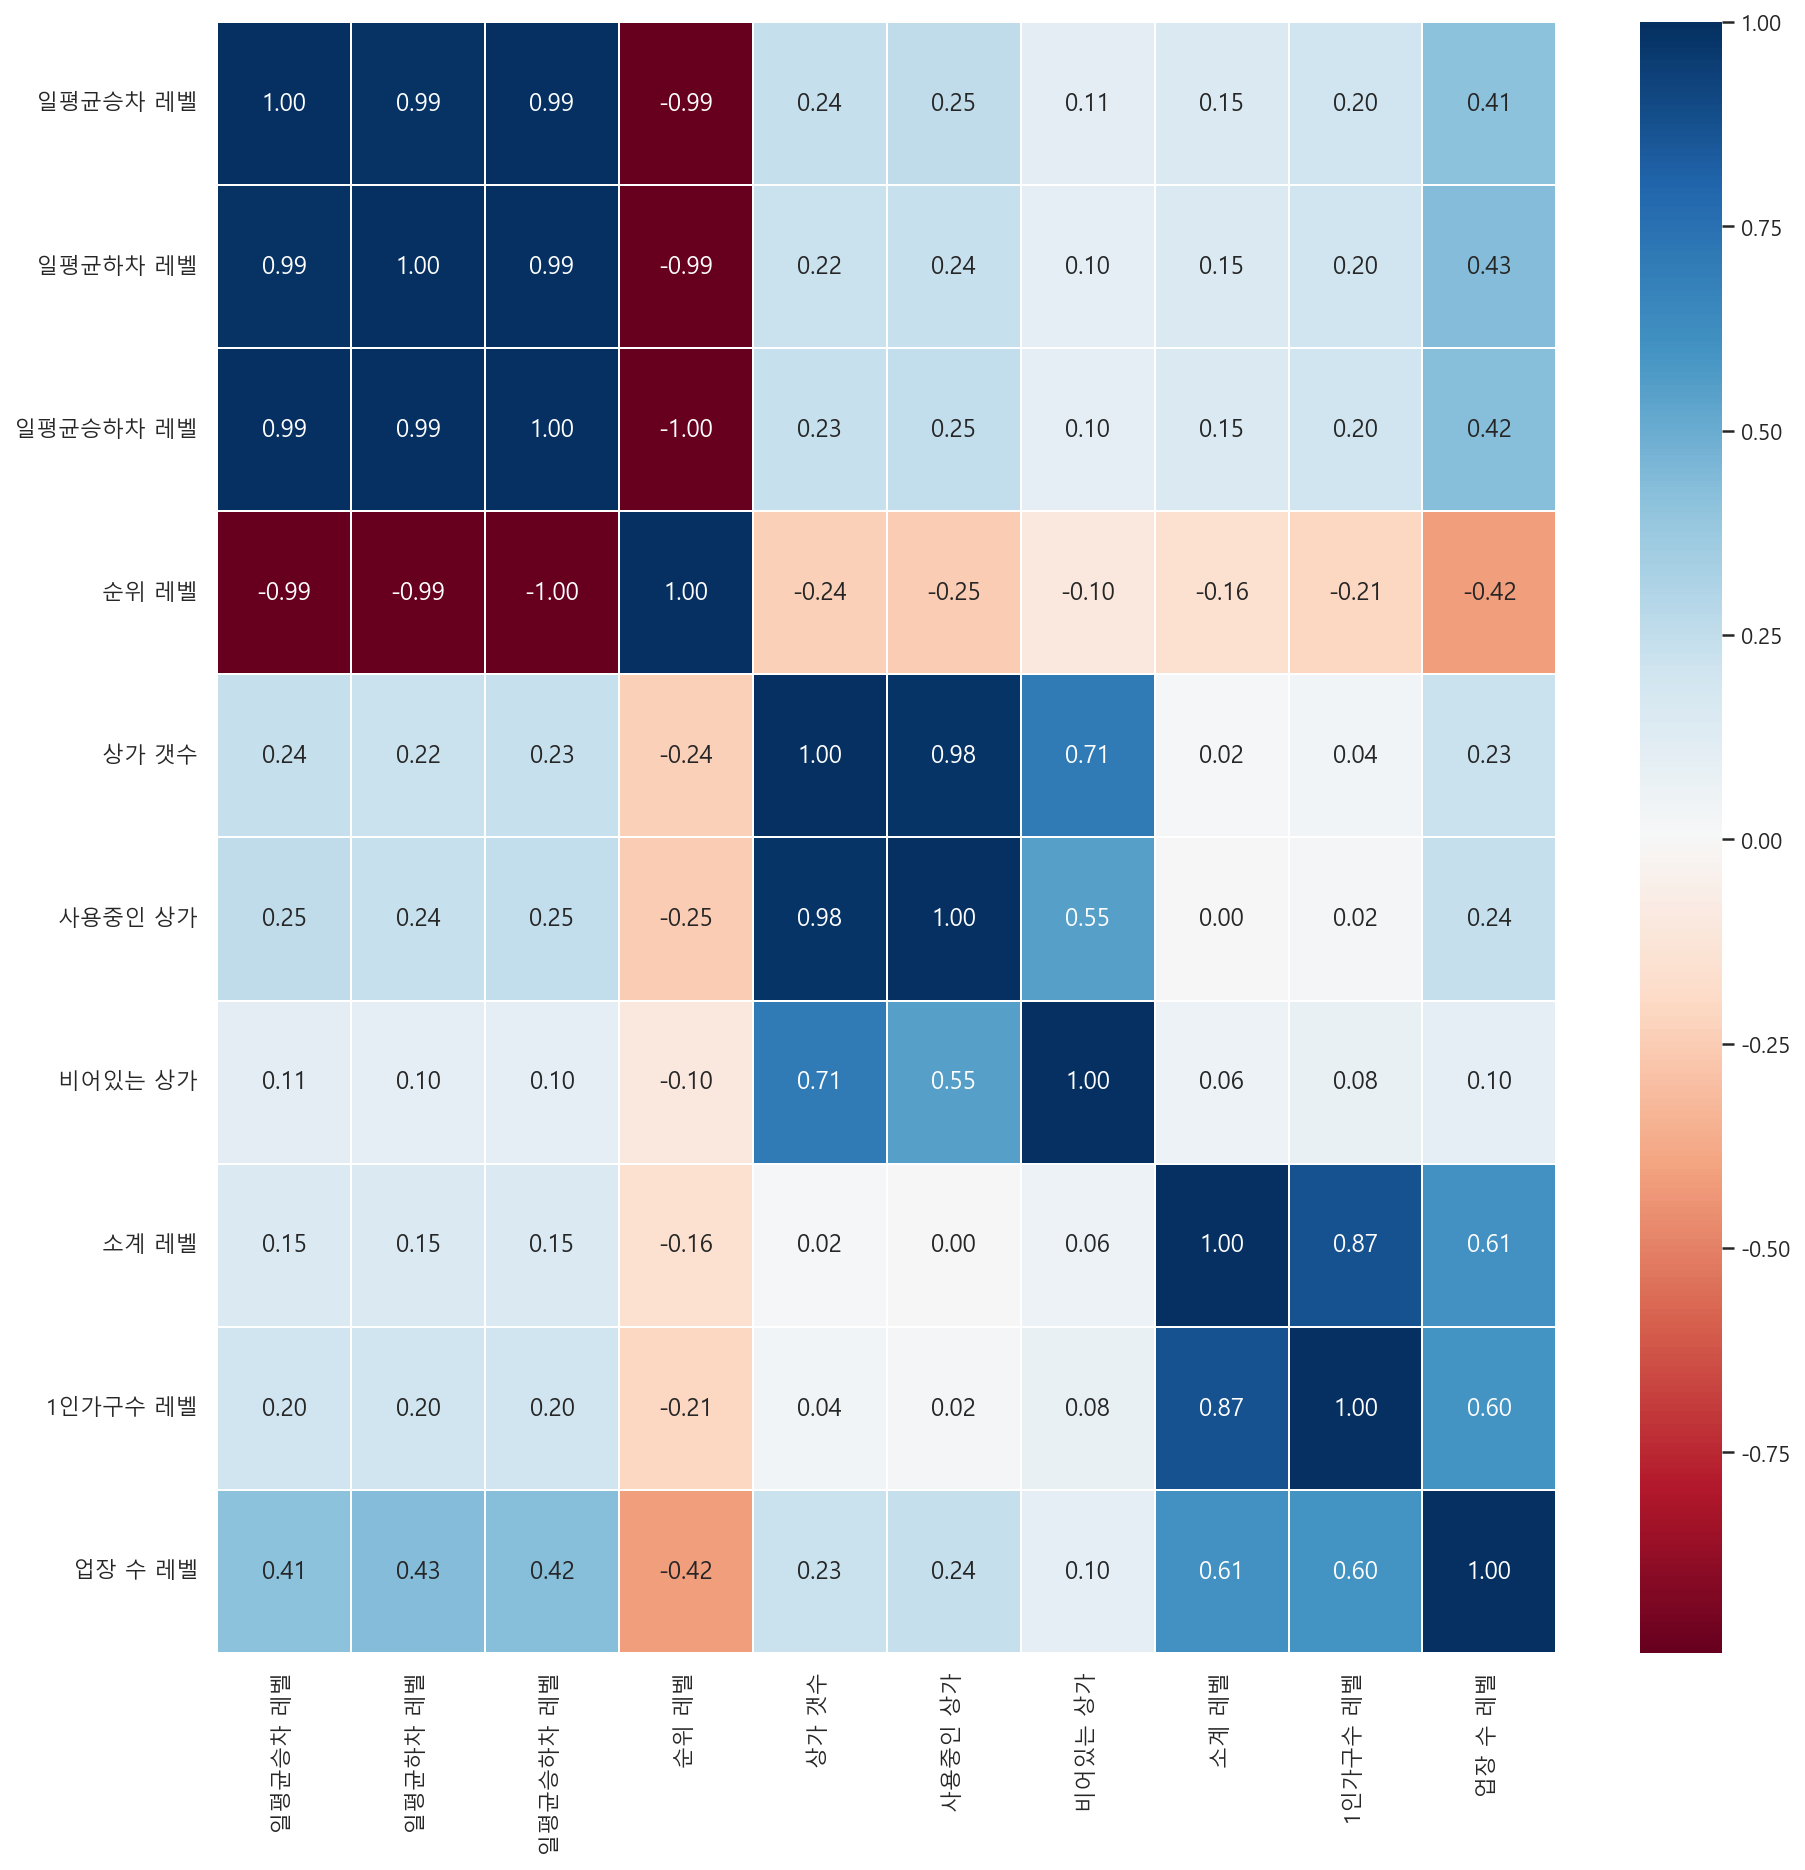

In [39]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.2f', linewidths=0.1, cmap=color_map)
plt.show()